In [44]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB  
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laurenphipps/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/laurenphipps/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/laurenphipps/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
#read in data
office = pd.read_csv('The-Office-Lines-V3.csv', encoding='latin1')
#isolate 'dinner party' episode
df = office[office['title'] == 'Dinner Party']
#drop not needed columns
df = df.drop(columns = ['season', 'episode', 'title'])

In [46]:
df

,scene,speaker,line
16583,2803,Stanley,This is ridiculous.
16584,2803,Phyllis,Do you have any idea what time we'll get out o...
16585,2803,Michael,"Nobody likes to work late, least of all me. D..."
16586,2803,Jim,"Nope I don't, remember when you told us not to..."
16587,2803,Michael,"Yes I remember. Mmm, this is B.S. This is B.S...."
...,...,...,...
16860,2823,Pam,"This is the best burger I've ever had, babe."
16861,2823,Jim,"You know, babe, I should have told you but... ..."
16862,2823,Pam,Hmm?
16863,2823,Jim,I stole this. For you babe.


In [47]:
df.speaker.value_counts()

Michael        89
Jan            73
Jim            38
Pam            28
Dwight         16
Angela         12
Andy           10
Woman           5
Officer 1       3
Officer 2       2
Officer         1
Michae          1
Hunter's CD     1
Phyllis         1
Stanley         1
All             1
Name: speaker, dtype: int64

In [48]:
#fix typo
df.replace({'Michae': 'Michael'}, inplace = True)

In [49]:
#tokenize lines
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

df['tokenized_line'] = [tokenizer.tokenize(x) for x in df['line']]
df.tokenized_line

16583                               [This, is, ridiculous]
16584    [Do, you, have, any, idea, what, time, we, ll,...
16585    [Nobody, likes, to, work, late, least, of, all...
16586    [Nope, I, don, t, remember, when, you, told, u...
16587    [Yes, I, remember, Mmm, this, is, B, S, This, ...
                               ...                        
16860    [This, is, the, best, burger, I, ve, ever, had...
16861    [You, know, babe, I, should, have, told, you, ...
16862                                                [Hmm]
16863                     [I, stole, this, For, you, babe]
16864                                         [One, night]
Name: tokenized_line, Length: 282, dtype: object

In [50]:
lines = []
for i in range(len(df)):
    lines.extend(df.tokenized_line.iloc[i])
    i+=1

len(lines)

2952

In [51]:
lines = [x.lower() for x in lines]

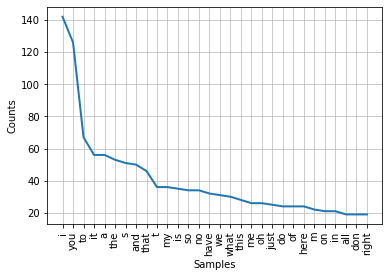

In [52]:
fdist = FreqDist(lines)

fdist.plot(30)

In [53]:
stop_words=set(stopwords.words("english"))
filtered_lines=[]
for w in lines:
    if w not in stop_words:
        filtered_lines.append(w)
       

AttributeError: 'Line2D' object has no property 'figsize'

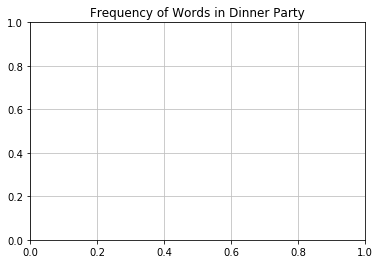

In [85]:

fdist = FreqDist(filtered_lines)

fdist.plot(20, title = 'Frequency of Words in Dinner Party', figsize = (10, 5))


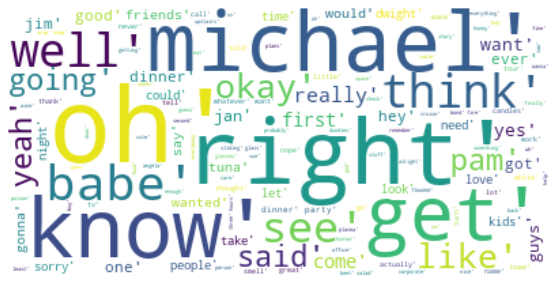

In [57]:
text = str(filtered_lines)

cloud = WordCloud(background_color= 'white').generate(text)

plt.figure(figsize = (10,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words = stop_words)
text_tf= tf.fit_transform(df['line'])
text_tf.data

array([1.        , 0.47757147, 0.57857146, ..., 0.54537074, 0.7551151 ,
       0.65559224])

In [ ]:
text_tf

In [26]:
from textblob import TextBlob


pandas.core.series.Series

In [33]:
strlines = str(filtered_lines)

In [35]:
TextBlob(strlines).sentiment

Sentiment(polarity=0.18703676686349963, subjectivity=0.5319976091015695)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['line'])


,00,000,10,2,200,4,49ers,9,aaahhh,abandon,...,workspace,world,wouldn,wow,write,yeah,year,yep,yes,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
pd.DataFrame(text_counts)

,0
0,"(0, 404)\t1"
1,"(0, 249)\t1\n (0, 501)\t1\n (0, 289)\t1"
2,"(0, 286)\t1\n (0, 556)\t1\n (0, 277)\t1\n ..."
3,"(0, 367)\t1\n (0, 333)\t1\n (0, 156)\t1\n ..."
4,"(0, 556)\t1\n (0, 156)\t2\n (0, 479)\t2\n ..."
...,...
277,"(0, 534)\t1\n (0, 41)\t1\n (0, 54)\t1\n (..."
278,"(0, 505)\t1\n (0, 143)\t1\n (0, 41)\t1\n ..."
279,"(0, 232)\t1"
280,"(0, 41)\t1\n (0, 468)\t1"


In [39]:
df2 = pd.DataFrame(text_counts.todense(),columns = cv.get_feature_names())
df2

,00,000,10,2,200,4,49ers,9,aaahhh,abandon,...,workspace,world,wouldn,wow,write,yeah,year,yep,yes,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['line'])
text_tf.data

KeyError: 'line'